## Shack Labs : Data Scientist Assignment

## Part 1: Predict the price of a house Dataset: 

Problem statement: The goal is to understand the relationship between house features and how these variables affect the house price.

## Importing The Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import probplot

## Reading The Dataset

In [5]:
df = pd.read_csv(r"C:\Users\Vishal\Downloads\DS - Assignment Part 1 data set.csv")
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [6]:
df.shape

(414, 9)

In [7]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.rename({'House size (sqft)': 'Area (sqft)', 'House price of unit area': 'Price', 'House Age': 'Age'},axis=1,inplace=True)

In [10]:
df.describe()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


## EDA (Exploratory Data Analysis)

Skewness of Age: 0.38292623077299737
Kurtosis of Age: -0.8771201112290763


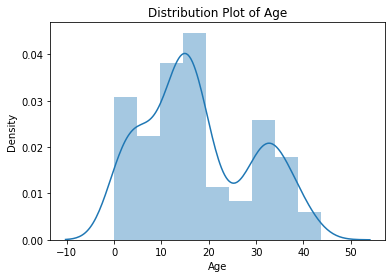

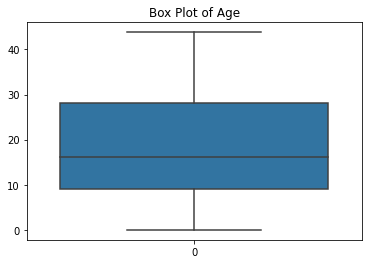

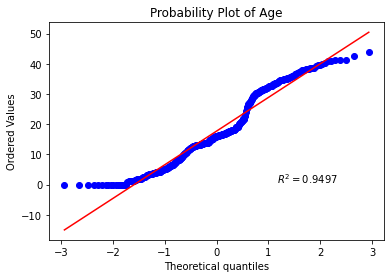

Skewness of Distance from nearest Metro station (km): 1.8887565801256048
Kurtosis of Distance from nearest Metro station (km): 3.20786836751181


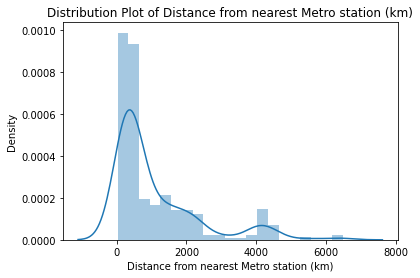

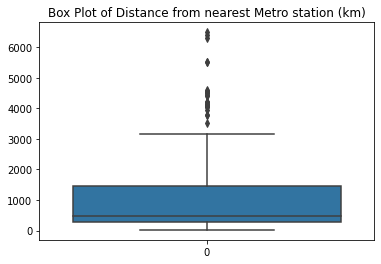

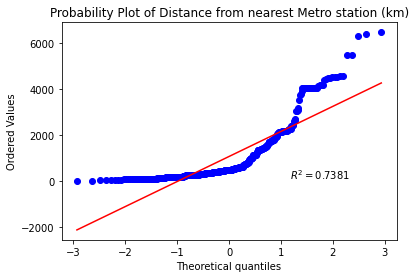

Skewness of Number of convenience stores: 0.15460656758377123
Kurtosis of Number of convenience stores: -1.0657514990134194


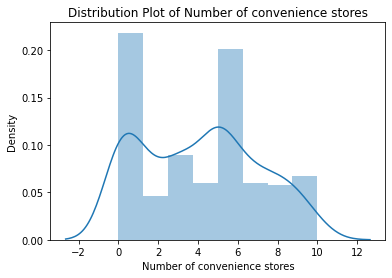

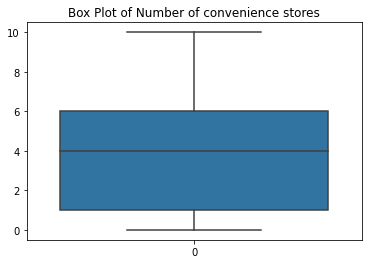

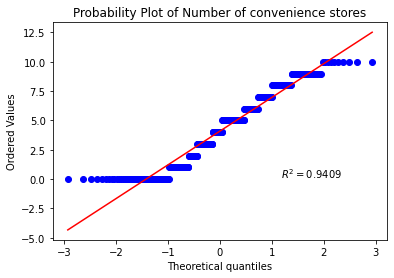

Skewness of latitude: -0.4385984450390504
Kurtosis of latitude: 0.26906977798608933


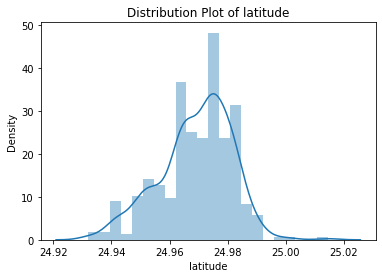

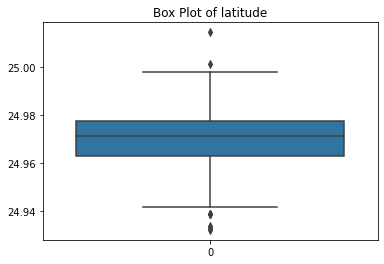

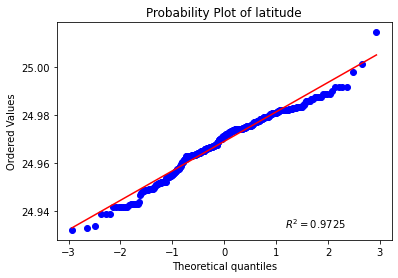

Skewness of longitude: -1.2195914979891498
Kurtosis of longitude: 1.2017924639738427


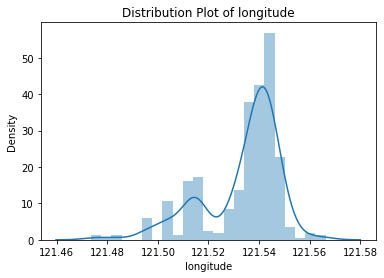

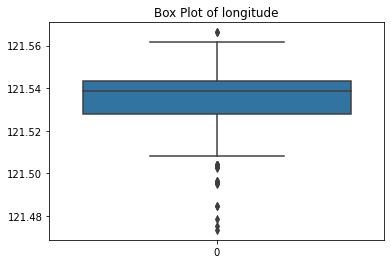

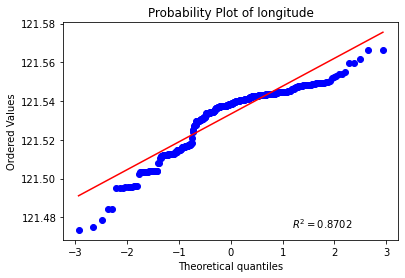

Skewness of Number of bedrooms: 0.022309017612164857
Kurtosis of Number of bedrooms: -1.5084574767476928


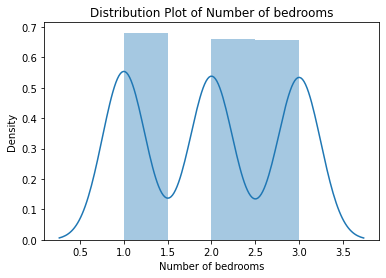

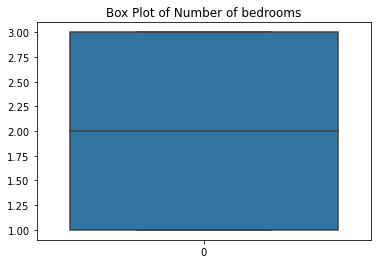

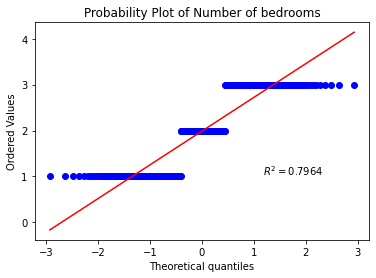

Skewness of Area (sqft): -0.11362728091036625
Kurtosis of Area (sqft): -1.4220194906438015


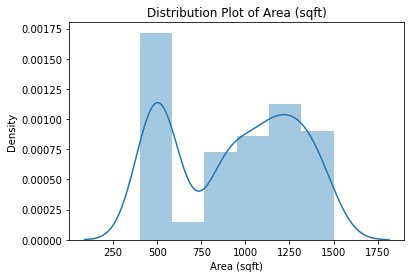

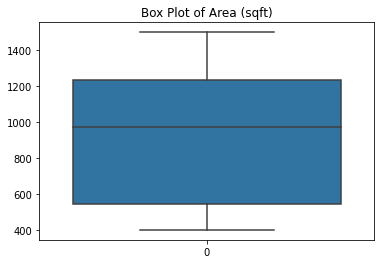

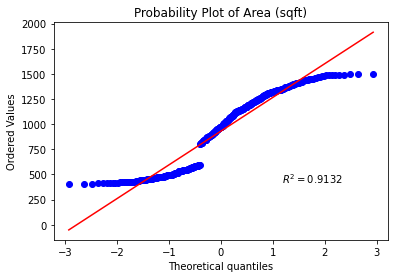

Skewness of Price: 0.5998525842660576
Kurtosis of Price: 2.1790970477396163


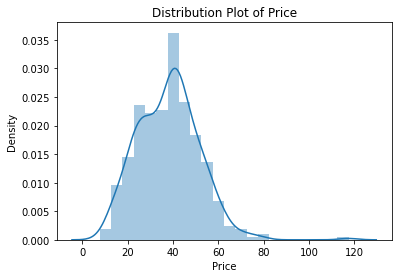

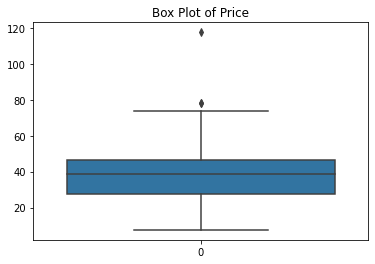

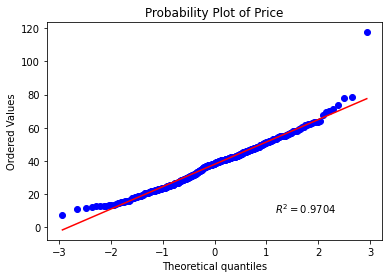

In [11]:
for col in df.columns:
    if col != 'Transaction date':
        print(f"Skewness of {col}:",df[col].skew())
        print(f"Kurtosis of {col}:",df[col].kurtosis())
        sns.distplot(df[col])
        plt.title(f'Distribution Plot of {col}')
        plt.show()
        sns.boxplot(df[col])
        plt.title(f'Box Plot of {col}')
        plt.show()
        probplot(df[col],plot=plt,rvalue=True)
        plt.title(f'Probability Plot of {col}')
        plt.show();

The features which have a right skewed distribution are house age, distance from the nearest metro station and the target feature i.e. house price whereas those which have a left-skewed distribution are latitude and longitude.

In [12]:
df.corr()['Price'].sort_values(ascending=False)[1:]

Number of convenience stores                0.571005
latitude                                    0.546307
longitude                                   0.523287
Transaction date                            0.087491
Number of bedrooms                          0.050265
Area (sqft)                                 0.046489
Age                                        -0.210567
Distance from nearest Metro station (km)   -0.673613
Name: Price, dtype: float64

The number of convenience stores, latitude and longitude are the features that have a significant positive correlation with the target house price feature. On the other hand, distance from the nearest metro station (in km) has a high negative correlation with house price.

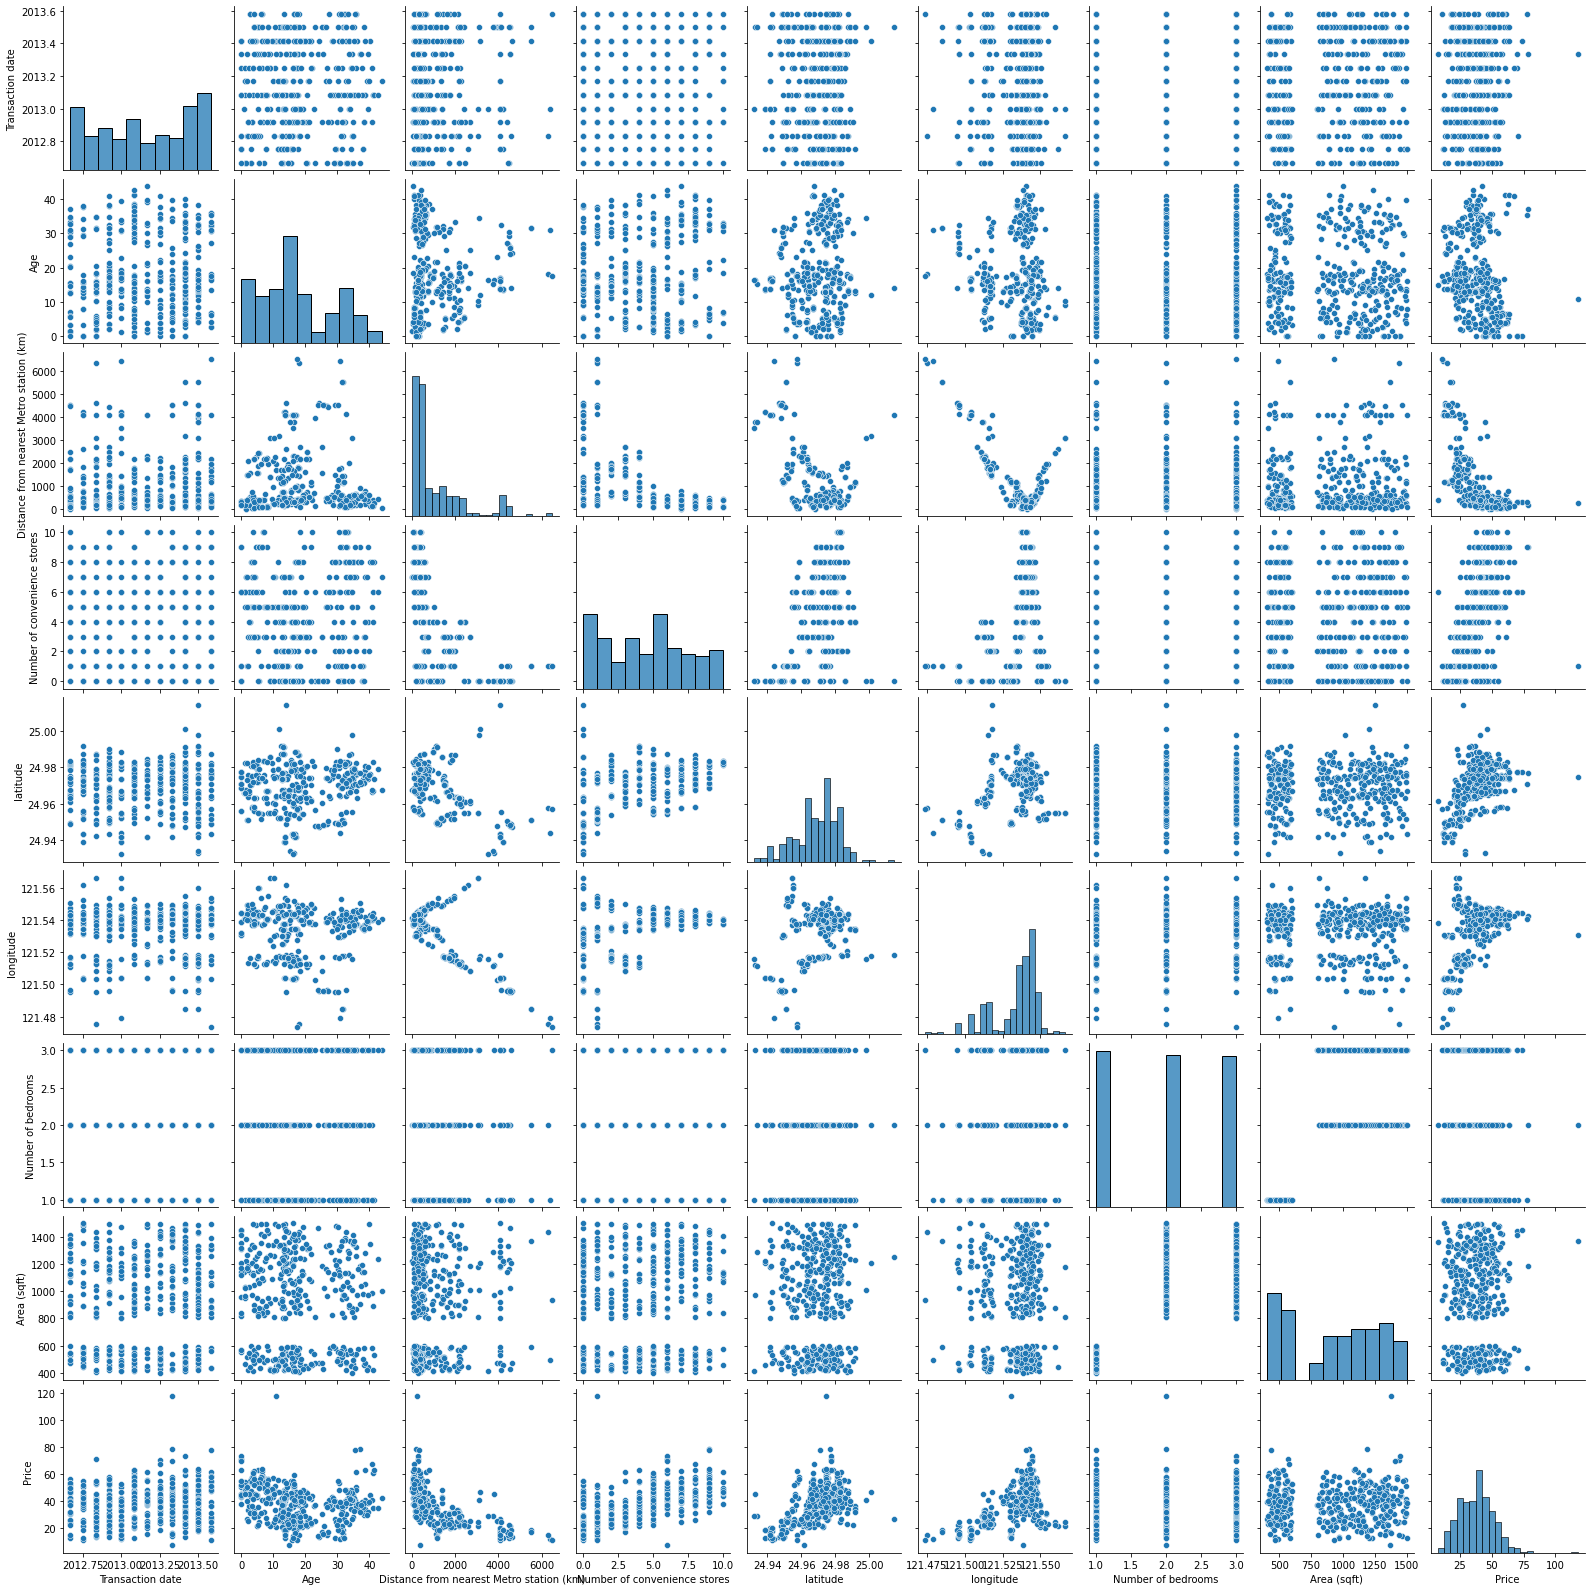

In [13]:
sns.pairplot(df,palette='viridis')

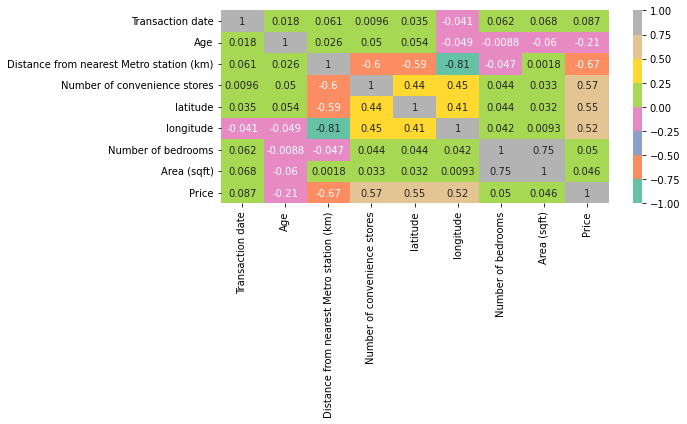

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Set2',vmin=-1,vmax=1)
plt.tight_layout();

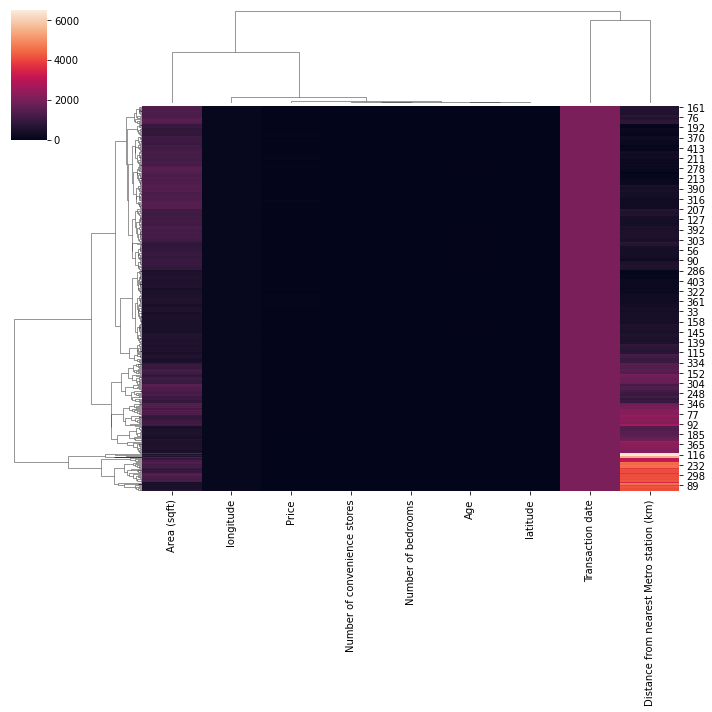

In [15]:
sns.clustermap(df)

In [16]:
# outlier_cols = ['Distance from nearest Metro station (km)']
# for col in outlier_cols:
#     lower_limit, upper_limit = df[col].quantile(0.25), df[col].quantile(0.75)
#     IQR = upper_limit - lower_limit
#     lower_whisker = lower_limit - 1.5 * IQR
#     upper_whisker = upper_limit + 1.5 * IQR
#     df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]

## Creating a copy of the original dataframe

In [17]:
df_copy = df.copy()
df_copy.head()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


## Feature Scaling using Standard Scaler

In [18]:
scaler = StandardScaler()
features = df_copy.columns
df_copy = scaler.fit_transform(df_copy)
df_copy = pd.DataFrame(df_copy,columns=features)
df_copy.head()

,Transaction date,Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,Area (sqft),Price
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-1.207899,-1.022920,-0.005901
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.014766,0.885321,0.310507
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237432,0.368804,0.685782
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.014766,-0.162059,1.237656
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,-1.207899,-1.263960,0.376732


## Splitting the dataset into training and test sets

In [19]:
X = df.drop('Price',axis=1)
y = df.Price

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101,shuffle=True)

### Training the Model and Evaluation

In [21]:
models = []
scores = []

In [22]:
def fit_and_test_model(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
    print("R2 Score:",r2_score(y_test,pred))
    models.append(str(model).split('(')[0])
    scores.append(r2_score(y_test,pred))

In [23]:
fit_and_test_model(LinearRegression())

RMSE: 6.8661632883320065
R2 Score: 0.6438622884394505


In [24]:
fit_and_test_model(KNeighborsRegressor())

RMSE: 7.784480149631059
R2 Score: 0.5422283006670428


In [25]:
fit_and_test_model(SVR())

RMSE: 7.34165920353461
R2 Score: 0.5928277699184732


In [26]:
fit_and_test_model(GradientBoostingRegressor())

RMSE: 5.51432467552554
R2 Score: 0.7702929231664317


In [27]:
fit_and_test_model(BaggingRegressor())

RMSE: 5.8447852997351415
R2 Score: 0.7419363509201312


In [28]:
fit_and_test_model(HistGradientBoostingRegressor())

RMSE: 5.653976288623789
R2 Score: 0.7585108212734839


In [29]:
fit_and_test_model(ExtraTreesRegressor())

RMSE: 5.332759365281727
R2 Score: 0.7851706160667951


In [30]:
fit_and_test_model(DecisionTreeRegressor())

RMSE: 8.125722121756318
R2 Score: 0.5012147042965422


In [31]:
fit_and_test_model(RandomForestRegressor())

RMSE: 5.721907989473441
R2 Score: 0.7526730461329073


In [32]:
fit_and_test_model(XGBRegressor())

RMSE: 6.190660825822127
R2 Score: 0.7104898929650898


In [33]:
fit_and_test_model(CatBoostRegressor())

Learning rate set to 0.033651
0:	learn: 14.1241495	total: 157ms	remaining: 2m 36s
1:	learn: 13.8764684	total: 160ms	remaining: 1m 19s
2:	learn: 13.6288218	total: 162ms	remaining: 53.8s
3:	learn: 13.4105086	total: 164ms	remaining: 40.9s
4:	learn: 13.1913690	total: 168ms	remaining: 33.3s
5:	learn: 12.9857671	total: 171ms	remaining: 28.3s
6:	learn: 12.7650770	total: 174ms	remaining: 24.6s
7:	learn: 12.5703653	total: 177ms	remaining: 21.9s
8:	learn: 12.3914403	total: 180ms	remaining: 19.8s
9:	learn: 12.2113399	total: 182ms	remaining: 18.1s
10:	learn: 12.0259559	total: 185ms	remaining: 16.6s
11:	learn: 11.8589065	total: 187ms	remaining: 15.4s
12:	learn: 11.6886072	total: 190ms	remaining: 14.4s
13:	learn: 11.5213490	total: 193ms	remaining: 13.6s
14:	learn: 11.3660748	total: 196ms	remaining: 12.9s
15:	learn: 11.2065066	total: 199ms	remaining: 12.2s
16:	learn: 11.0536121	total: 201ms	remaining: 11.7s
17:	learn: 10.8965437	total: 204ms	remaining: 11.2s
18:	learn: 10.7392175	total: 207ms	remaini

226:	learn: 4.6836933	total: 751ms	remaining: 2.56s
227:	learn: 4.6750109	total: 754ms	remaining: 2.55s
228:	learn: 4.6686444	total: 757ms	remaining: 2.55s
229:	learn: 4.6592535	total: 759ms	remaining: 2.54s
230:	learn: 4.6509836	total: 762ms	remaining: 2.54s
231:	learn: 4.6420253	total: 764ms	remaining: 2.53s
232:	learn: 4.6397441	total: 767ms	remaining: 2.52s
233:	learn: 4.6325185	total: 770ms	remaining: 2.52s
234:	learn: 4.6302062	total: 772ms	remaining: 2.51s
235:	learn: 4.6284439	total: 775ms	remaining: 2.51s
236:	learn: 4.6181920	total: 778ms	remaining: 2.5s
237:	learn: 4.6071072	total: 780ms	remaining: 2.5s
238:	learn: 4.5954848	total: 783ms	remaining: 2.49s
239:	learn: 4.5809787	total: 785ms	remaining: 2.49s
240:	learn: 4.5720677	total: 788ms	remaining: 2.48s
241:	learn: 4.5559340	total: 791ms	remaining: 2.48s
242:	learn: 4.5398574	total: 793ms	remaining: 2.47s
243:	learn: 4.5375509	total: 795ms	remaining: 2.46s
244:	learn: 4.5269692	total: 797ms	remaining: 2.46s
245:	learn: 4.

452:	learn: 3.1355470	total: 1.33s	remaining: 1.61s
453:	learn: 3.1275164	total: 1.33s	remaining: 1.61s
454:	learn: 3.1186207	total: 1.34s	remaining: 1.6s
455:	learn: 3.1162703	total: 1.34s	remaining: 1.6s
456:	learn: 3.1132610	total: 1.34s	remaining: 1.6s
457:	learn: 3.1108324	total: 1.35s	remaining: 1.59s
458:	learn: 3.1067964	total: 1.35s	remaining: 1.59s
459:	learn: 3.1037651	total: 1.35s	remaining: 1.59s
460:	learn: 3.0961515	total: 1.35s	remaining: 1.58s
461:	learn: 3.0925338	total: 1.36s	remaining: 1.58s
462:	learn: 3.0867113	total: 1.36s	remaining: 1.58s
463:	learn: 3.0781020	total: 1.36s	remaining: 1.57s
464:	learn: 3.0743556	total: 1.36s	remaining: 1.57s
465:	learn: 3.0702335	total: 1.37s	remaining: 1.56s
466:	learn: 3.0665376	total: 1.37s	remaining: 1.56s
467:	learn: 3.0603134	total: 1.37s	remaining: 1.56s
468:	learn: 3.0519800	total: 1.37s	remaining: 1.55s
469:	learn: 3.0421628	total: 1.38s	remaining: 1.55s
470:	learn: 3.0398852	total: 1.38s	remaining: 1.55s
471:	learn: 3.0

676:	learn: 2.1839548	total: 1.91s	remaining: 912ms
677:	learn: 2.1830814	total: 1.91s	remaining: 909ms
678:	learn: 2.1778080	total: 1.92s	remaining: 906ms
679:	learn: 2.1738660	total: 1.92s	remaining: 903ms
680:	learn: 2.1706679	total: 1.92s	remaining: 900ms
681:	learn: 2.1687821	total: 1.92s	remaining: 897ms
682:	learn: 2.1628864	total: 1.93s	remaining: 894ms
683:	learn: 2.1602143	total: 1.93s	remaining: 891ms
684:	learn: 2.1579734	total: 1.93s	remaining: 888ms
685:	learn: 2.1573152	total: 1.93s	remaining: 885ms
686:	learn: 2.1513114	total: 1.94s	remaining: 882ms
687:	learn: 2.1436572	total: 1.94s	remaining: 879ms
688:	learn: 2.1385088	total: 1.94s	remaining: 876ms
689:	learn: 2.1363305	total: 1.94s	remaining: 873ms
690:	learn: 2.1357834	total: 1.94s	remaining: 870ms
691:	learn: 2.1336577	total: 1.95s	remaining: 867ms
692:	learn: 2.1312348	total: 1.95s	remaining: 864ms
693:	learn: 2.1250252	total: 1.95s	remaining: 861ms
694:	learn: 2.1175800	total: 1.95s	remaining: 858ms
695:	learn: 

834:	learn: 1.6825754	total: 2.29s	remaining: 453ms
835:	learn: 1.6786698	total: 2.3s	remaining: 450ms
836:	learn: 1.6750512	total: 2.3s	remaining: 447ms
837:	learn: 1.6735363	total: 2.3s	remaining: 445ms
838:	learn: 1.6707494	total: 2.3s	remaining: 442ms
839:	learn: 1.6696000	total: 2.3s	remaining: 439ms
840:	learn: 1.6658442	total: 2.31s	remaining: 436ms
841:	learn: 1.6644620	total: 2.31s	remaining: 433ms
842:	learn: 1.6624231	total: 2.31s	remaining: 430ms
843:	learn: 1.6606525	total: 2.31s	remaining: 427ms
844:	learn: 1.6595782	total: 2.31s	remaining: 425ms
845:	learn: 1.6572723	total: 2.32s	remaining: 422ms
846:	learn: 1.6554122	total: 2.32s	remaining: 419ms
847:	learn: 1.6531783	total: 2.32s	remaining: 416ms
848:	learn: 1.6504723	total: 2.33s	remaining: 414ms
849:	learn: 1.6486444	total: 2.33s	remaining: 411ms
850:	learn: 1.6445453	total: 2.33s	remaining: 408ms
851:	learn: 1.6427203	total: 2.33s	remaining: 405ms
852:	learn: 1.6385185	total: 2.33s	remaining: 402ms
853:	learn: 1.634

992:	learn: 1.3040044	total: 2.68s	remaining: 18.9ms
993:	learn: 1.3008947	total: 2.69s	remaining: 16.2ms
994:	learn: 1.2989839	total: 2.69s	remaining: 13.5ms
995:	learn: 1.2962050	total: 2.69s	remaining: 10.8ms
996:	learn: 1.2952818	total: 2.69s	remaining: 8.11ms
997:	learn: 1.2941988	total: 2.7s	remaining: 5.4ms
998:	learn: 1.2921267	total: 2.7s	remaining: 2.7ms
999:	learn: 1.2910876	total: 2.7s	remaining: 0us
RMSE: 4.963206725764264
R2 Score: 0.8139136839788031


In [34]:
fit_and_test_model(MLPRegressor())

RMSE: 6.852794321500683
R2 Score: 0.6452477952624723


In [35]:
fit_and_test_model(LGBMRegressor())

RMSE: 5.784440062319054
R2 Score: 0.7472376645221062


## Performance of Models

In [36]:
model_performances = pd.DataFrame([models,scores]).T
model_performances.columns = ['Model','R2 Score']
model_performances.set_index('Model',inplace=True)
model_performances = model_performances.sort_values('R2 Score',ascending=False)
model_performances

,R2 Score
Model,
<catboost.core.CatBoostRegressor object at 0x00000209A48962C0>,0.813914
ExtraTreesRegressor,0.785171
GradientBoostingRegressor,0.770293
HistGradientBoostingRegressor,0.758511
RandomForestRegressor,0.752673
LGBMRegressor,0.747238
BaggingRegressor,0.741936
XGBRegressor,0.71049
MLPRegressor,0.645248


#### Among the baseline models, Cat Boost Regressor is the best performing model with an excellent accuracy score of about 81.39%.

## Model Optimization & Cross Validation using Hyperparameter Tuning

In [37]:
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
cat = CatBoostRegressor(silent=True)
xgb = XGBRegressor(eval_metric = 'logloss', use_label_encoder=False)
bag = BaggingRegressor()
et = ExtraTreesRegressor()
gb = GradientBoostingRegressor()
hist = HistGradientBoostingRegressor()
lgbm = LGBMRegressor()
#KNN
para_knn = {'n_neighbors':np.arange(1, 50),'metric': ['manhattan','euclidean','minkowski','chebyshev'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform','distance']}  
grid_knn = GridSearchCV(knn, param_grid=para_knn) 

#Decision Tree
para_dt = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"], 'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt)

#Random Forest
params_rf = {'n_estimators':[100,200, 350,500], 'min_samples_leaf':[2, 10, 30], 'bootstrap': [True,False]}
grid_rf = GridSearchCV(rf, param_grid=params_rf)

#Histogram Gradient Boosting 
params_hist = {'loss': ['squared_error', 'absolute_error', 'poisson'], 'learning_rate': [0.2,0.5,0.8,1]}
grid_hist = GridSearchCV(hist, params_hist)

#Light GBM
params_lgbm = {'n_estimators': [100,300,600,900], 'learning_rate': [0.2,0.5,0.8,1]}
grid_lgbm = GridSearchCV(lgbm, params_lgbm)

#CatBoost
params_cat = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_cat =  GridSearchCV(cat, params_cat)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
grid_xgb =  GridSearchCV(xgb, params_xgb)

#Bagging 
params_bag = {'n_estimators':[100,350,500,750]}
grid_bag = GridSearchCV(bag, params_bag)

#Extra Trees
params_et = {'n_estimators': [100,300,500,800,100], 'bootstrap': [True,False], 'max_features': ['sqrt','log2']}
grid_et = GridSearchCV(et, params_et)

#Gradient Boosting
params_gb = {'n_estimators': np.arange(100,900,200), 'learning_rate': np.linspace(0,1,5), 'max_features': ['sqrt','log2'], 'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']}
grid_gb = GridSearchCV(gb, params_gb)

In [38]:
grid_knn.fit(X_train,y_train)
pred = grid_knn.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 7.491291685090836
R2 Score: 0.576061241625119


In [40]:
grid_dt.fit(X_train,y_train)
pred = grid_dt.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 7.001087005324391
R2 Score: 0.6297281819137606


In [41]:
grid_rf.fit(X_train,y_train)
pred = grid_rf.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.791241947752807
R2 Score: 0.7466428718497153


In [42]:
grid_xgb.fit(X_train,y_train)
pred = grid_xgb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 6.00210099100448
R2 Score: 0.7278575401458205


In [43]:
grid_et.fit(X_train,y_train)
pred = grid_et.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.169605284738865
R2 Score: 0.7981148019884586


In [44]:
grid_cat.fit(X_train,y_train)
pred = grid_cat.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.2850056659347935
R2 Score: 0.7890008900443867


In [45]:
grid_bag.fit(X_train,y_train)
pred = grid_bag.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.635555527143713
R2 Score: 0.7600818105473404


In [46]:
grid_gb.fit(X_train,y_train)
pred = grid_gb.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.2519204840947165
R2 Score: 0.7916344133801458


In [47]:
grid_hist.fit(X_train,y_train)
pred = grid_hist.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 5.344353985027714
R2 Score: 0.7842354255971342


In [48]:
grid_lgbm.fit(X_train,y_train)
pred = grid_lgbm.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
print("R2 Score:",r2_score(y_test,pred))

RMSE: 6.055001192780785
R2 Score: 0.7230392829464825
